### Context
This dataset contains historical stock market data, including opening and closing prices, the highest and lowest points, 
and the S&P 500 index (symbol ^GSPC). The S&P 500 index tracks the performance of the 500 largest companies on the New York Stock Exchange and Nasdaq. 
The data spans from 2017 to 2024.

### Data Source
- Dataset: [kaggle](https://www.kaggle.com/datasets/eli2022/yahoo-finance-apple-inc-gspc)

### Data Importing and Overview

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv("Data/data.csv")

In [49]:
df.head(10)

,formatted_date,high,low,open,close,volume,adjclose,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
0,2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3625080000,2275.320068,55.349648,0.002830,-0.004252,0.000000,-0.003549,0.003517,-0.000771,0.005722,0.130704,-0.036609,-0.117038,0.004296,-0.001092,1
1,2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3466220000,2270.439941,69.412265,-0.002145,-0.043822,0.002830,0.000000,-0.003549,0.003517,-0.000771,-0.004252,0.130704,-0.036609,-0.117038,0.004296,0
2,2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3090680000,2274.639893,76.428044,0.001850,-0.108343,-0.002145,0.002830,0.000000,-0.003549,0.003517,-0.043822,-0.004252,0.130704,-0.036609,-0.117038,1
3,2017-01-17,2272.080078,2262.810059,2269.139893,2267.889893,3586950000,2267.889893,43.080303,-0.002968,0.160570,0.001850,-0.002145,0.002830,0.000000,-0.003549,-0.108343,-0.043822,-0.004252,0.130704,-0.036609,0
4,2017-01-18,2272.010010,2263.350098,2269.139893,2271.889893,3317670000,2271.889893,43.080303,0.001764,-0.075072,-0.002968,0.001850,-0.002145,0.002830,0.000000,0.160570,-0.108343,-0.043822,-0.004252,0.130704,1
5,2017-01-19,2274.330078,2258.409912,2271.899902,2263.689941,3168390000,2263.689941,67.523620,-0.003609,-0.044995,0.001764,-0.002968,0.001850,-0.002145,0.002830,-0.075072,0.160570,-0.108343,-0.043822,-0.004252,0
6,2017-01-20,2276.959961,2265.010010,2269.959961,2271.310059,3536850000,2271.310059,46.479584,0.003366,0.116293,-0.003609,0.001764,-0.002968,0.001850,-0.002145,-0.044995,-0.075072,0.160570,-0.108343,-0.043822,1
7,2017-01-23,2271.780029,2257.020020,2267.780029,2265.199951,3155240000,2265.199951,30.472144,-0.002690,-0.107895,0.003366,-0.003609,0.001764,-0.002968,0.001850,0.116293,-0.044995,-0.075072,0.160570,-0.108343,0
8,2017-01-24,2284.629883,2266.679932,2267.879883,2280.070068,3816950000,2280.070068,32.079356,0.006565,0.209718,-0.002690,0.003366,-0.003609,0.001764,-0.002968,-0.107895,0.116293,-0.044995,-0.075072,0.160570,1
9,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3849340000,2298.370117,91.809142,0.008026,0.008486,0.006565,-0.002690,0.003366,-0.003609,0.001764,0.209718,-0.107895,0.116293,-0.044995,-0.075072,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   formatted_date  1857 non-null   object 
 1   high            1857 non-null   float64
 2   low             1857 non-null   float64
 3   open            1857 non-null   float64
 4   close           1857 non-null   float64
 5   volume          1857 non-null   int64  
 6   adjclose        1857 non-null   float64
 7   rsi             1857 non-null   float64
 8   d_return        1857 non-null   float64
 9   volume_change   1857 non-null   float64
 10  r_lag1          1857 non-null   float64
 11  r_lag2          1857 non-null   float64
 12  r_lag3          1857 non-null   float64
 13  r_lag4          1857 non-null   float64
 14  r_lag5          1857 non-null   float64
 15  v_lag1          1857 non-null   float64
 16  v_lag2          1857 non-null   float64
 17  v_lag3          1857 non-null   f

In [51]:
df.describe()

,high,low,open,close,volume,adjclose,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
count,1857.000000,1857.000000,1857.000000,1857.000000,1.857000e+03,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,3538.908257,3498.878890,3519.564660,3520.152645,4.079932e+09,3520.152645,57.858977,0.000525,0.014459,0.000529,0.000527,0.000525,0.000529,0.000534,0.014558,0.014405,0.014462,0.014461,0.014434,0.544426
std,827.437443,818.767849,822.991396,823.358807,1.002106e+09,823.358807,26.094840,0.011953,0.178146,0.011951,0.011952,0.011951,0.011949,0.011950,0.178159,0.178081,0.178021,0.178021,0.178020,0.498157
min,2271.780029,2191.860107,2267.780029,2237.399902,1.296530e+09,2237.399902,0.583613,-0.119841,-0.658696,-0.119841,-0.119841,-0.119841,-0.119841,-0.119841,-0.658696,-0.658696,-0.658696,-0.658696,-0.658696,0.000000
25%,2789.800049,2761.729980,2779.820068,2776.419922,3.461920e+09,2776.419922,36.682234,-0.003841,-0.067636,-0.003816,-0.003816,-0.003816,-0.003812,-0.003812,-0.067636,-0.067636,-0.067636,-0.067636,-0.067636,0.000000
50%,3399.959961,3366.840088,3384.560059,3385.489990,3.873100e+09,3385.489990,61.806738,0.000742,-0.003879,0.000742,0.000742,0.000742,0.000742,0.000746,-0.003559,-0.003879,-0.003879,-0.003879,-0.003879,1.000000
75%,4257.160156,4201.640137,4229.339844,4227.259766,4.445260e+09,4227.259766,79.983210,0.006224,0.076369,0.006224,0.006224,0.006199,0.006199,0.006199,0.076543,0.076369,0.076369,0.076369,0.076369,1.000000
max,5341.879883,5302.399902,5340.259766,5321.410156,9.976520e+09,5321.410156,99.399917,0.093828,1.270527,0.093828,0.093828,0.093828,0.093828,0.093828,1.270527,1.270527,1.270527,1.270527,1.270527,1.000000


### Data Cleaning

In [52]:
df.isna().sum()

formatted_date    0
high              0
low               0
open              0
close             0
volume            0
adjclose          0
rsi               0
d_return          0
volume_change     0
r_lag1            0
r_lag2            0
r_lag3            0
r_lag4            0
r_lag5            0
v_lag1            0
v_lag2            0
v_lag3            0
v_lag4            0
v_lag5            0
trend             0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.dtypes

formatted_date     object
high              float64
low               float64
open              float64
close             float64
volume              int64
adjclose          float64
rsi               float64
d_return          float64
volume_change     float64
r_lag1            float64
r_lag2            float64
r_lag3            float64
r_lag4            float64
r_lag5            float64
v_lag1            float64
v_lag2            float64
v_lag3            float64
v_lag4            float64
v_lag5            float64
trend               int64
dtype: object

In [55]:
df['date'] = pd.to_datetime(df['formatted_date'])

In [61]:
df_cleaned = df[['date', 'high', 'low', 'open', 'close', 'volume']]

In [62]:
df_cleaned.head()

,date,high,low,open,close,volume
0,2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3625080000
1,2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3466220000
2,2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3090680000
3,2017-01-17,2272.080078,2262.810059,2269.139893,2267.889893,3586950000
4,2017-01-18,2272.010010,2263.350098,2269.139893,2271.889893,3317670000


In [63]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1857 non-null   datetime64[ns]
 1   high    1857 non-null   float64       
 2   low     1857 non-null   float64       
 3   open    1857 non-null   float64       
 4   close   1857 non-null   float64       
 5   volume  1857 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 87.2 KB


### EDA

#### What are the mean, median, and standard deviation of the opening, closing, high, and low prices?

In [203]:
df_cleaned.describe()

,date,high,low,open,close,volume
count,1857,1857.000000,1857.000000,1857.000000,1857.000000,1.857000e+03
mean,2020-09-18 14:40:07.754442496,3538.908257,3498.878890,3519.564660,3520.152645,4.079932e+09
min,2017-01-11 00:00:00,2271.780029,2191.860107,2267.780029,2237.399902,1.296530e+09
25%,2018-11-13 00:00:00,2789.800049,2761.729980,2779.820068,2776.419922,3.461920e+09
50%,2020-09-18 00:00:00,3399.959961,3366.840088,3384.560059,3385.489990,3.873100e+09
75%,2022-07-25 00:00:00,4257.160156,4201.640137,4229.339844,4227.259766,4.445260e+09
max,2024-05-29 00:00:00,5341.879883,5302.399902,5340.259766,5321.410156,9.976520e+09
std,NaN,827.437443,818.767849,822.991396,823.358807,1.002106e+09


#### What does the historical price and trading volume data for the S&P 500 look like in 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024?

In [84]:
def plot_price_and_volume(year: int):
    if year == -1:
        selected_df = df_cleaned
    else:
        selected_df = df_cleaned[df_cleaned['date'].dt.year == year]

    # Create subplots with specified figure size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot S&P 500's Close Price History
    ax1.plot(selected_df['date'], selected_df['close'])
    ax1.set_xlabel("Date", fontsize=14)
    ax1.set_ylabel("Stock Price", fontsize=14)
    ax1.grid(True)  

    # Plot S&P 500's Volume History
    ax2.plot(selected_df['date'], selected_df['volume'], color='orange')
    ax2.set_xlabel("Date", fontsize=14)
    ax2.set_ylabel("Volume", fontsize=14)  # Corrected label
    ax2.grid(True)  

    if year == -1:
        ax1.set_title(f"S&P 500 Close Price History", fontsize=16)
        ax2.set_title(f"S&P 500's Volume History", fontsize=16)
    else:
        ax1.set_title(f"S&P 500 Close Price History in {year}", fontsize=16)
        ax2.set_title(f"S&P 500's Volume History in {year}", fontsize=16)
    
    # Display the plots
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()


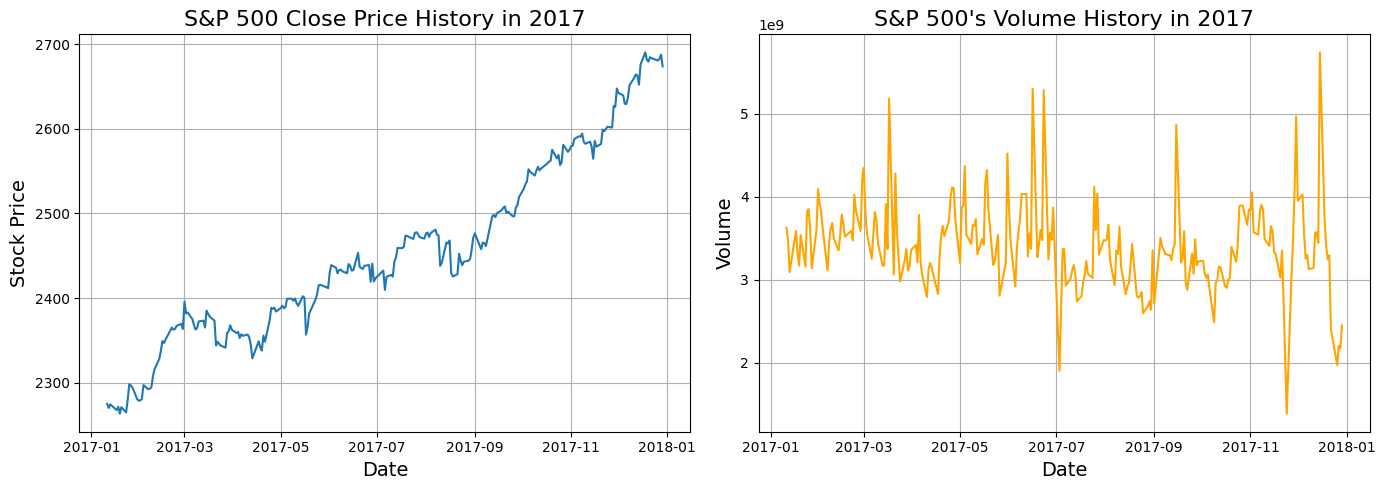

In [85]:
plot_price_and_volume(2017)

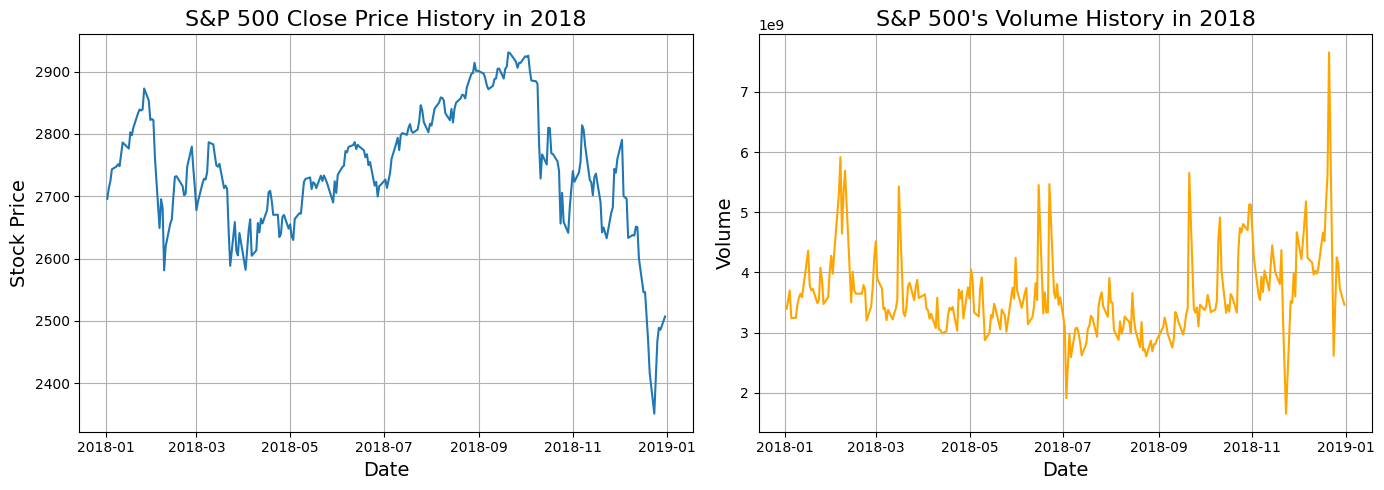

In [86]:
plot_price_and_volume(2018)

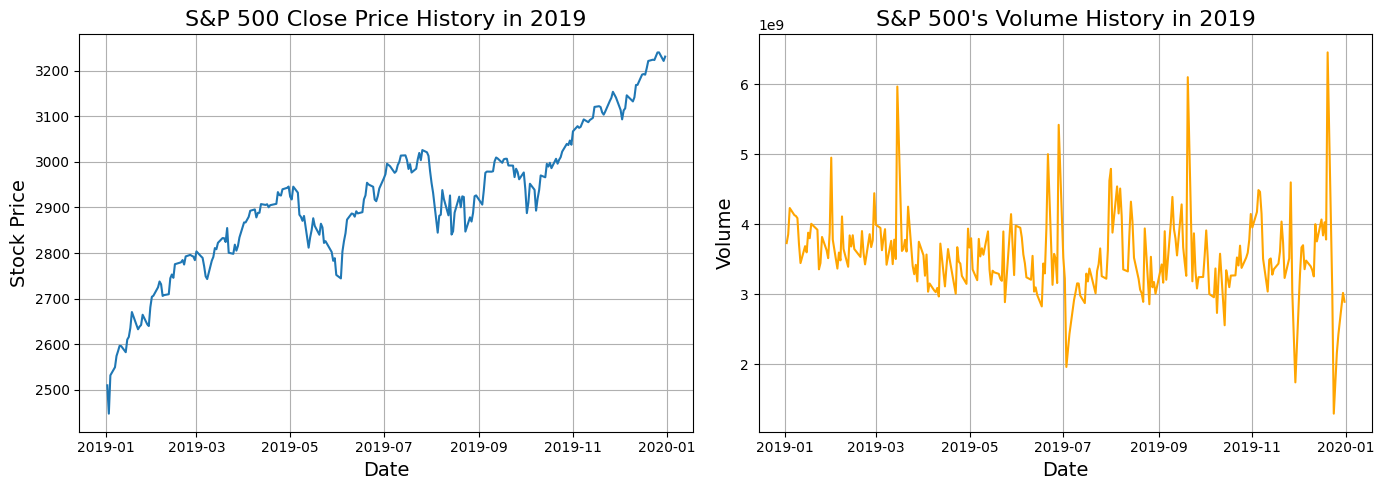

In [87]:
plot_price_and_volume(2019)

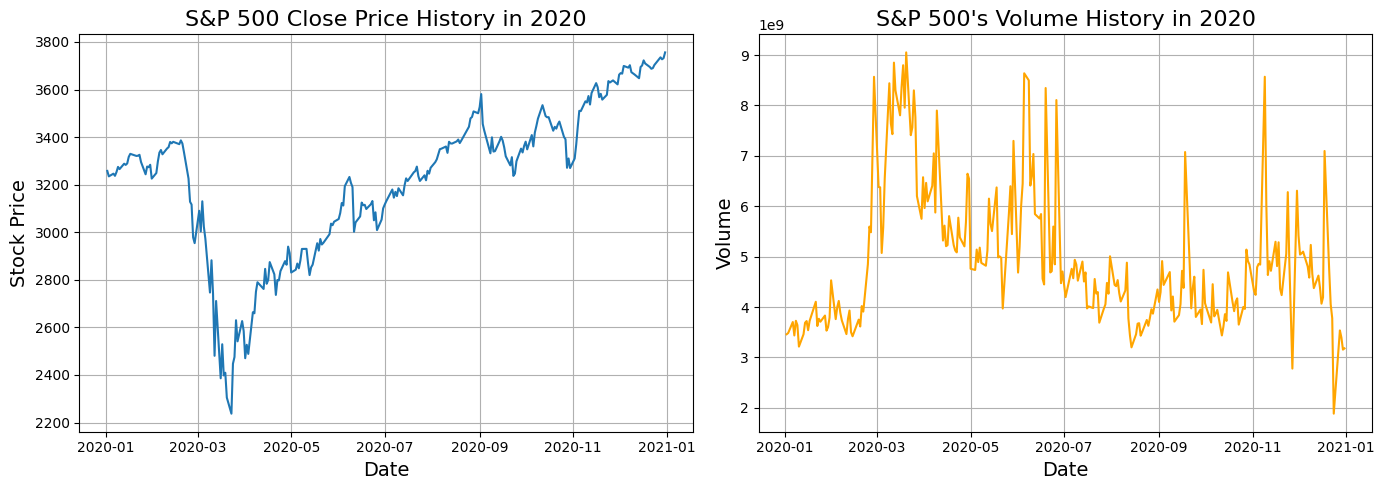

In [88]:
plot_price_and_volume(2020)

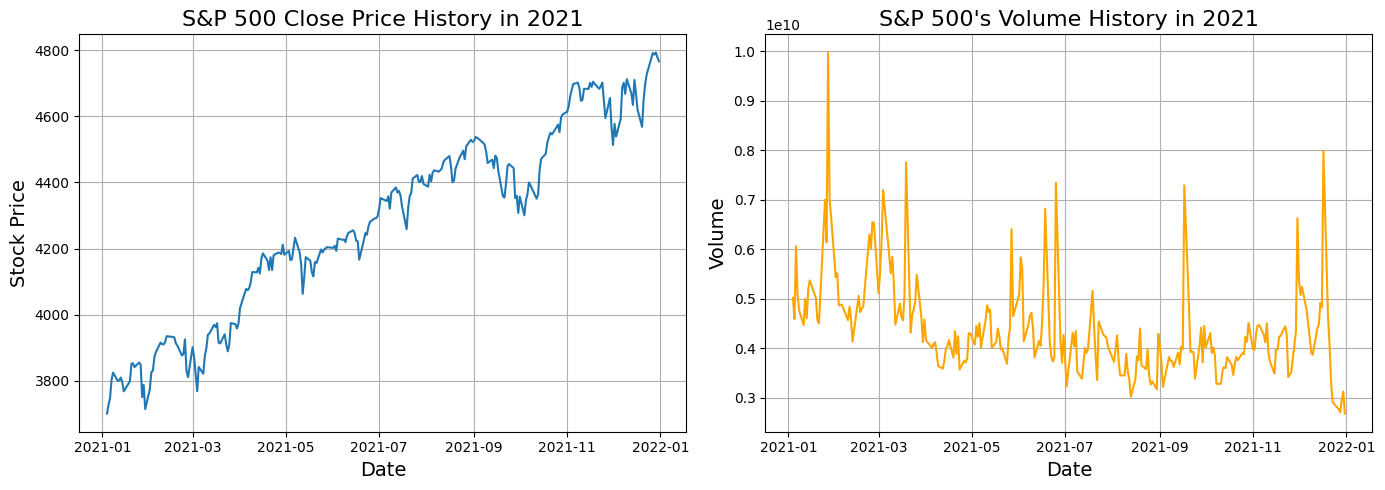

In [89]:
plot_price_and_volume(2021)

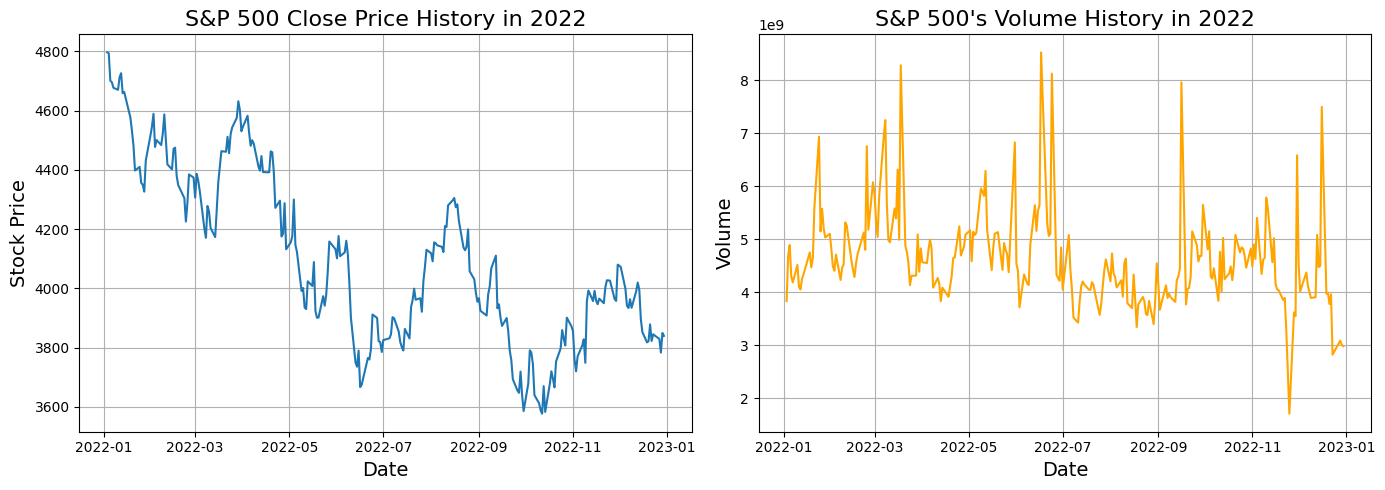

In [90]:
plot_price_and_volume(2022)

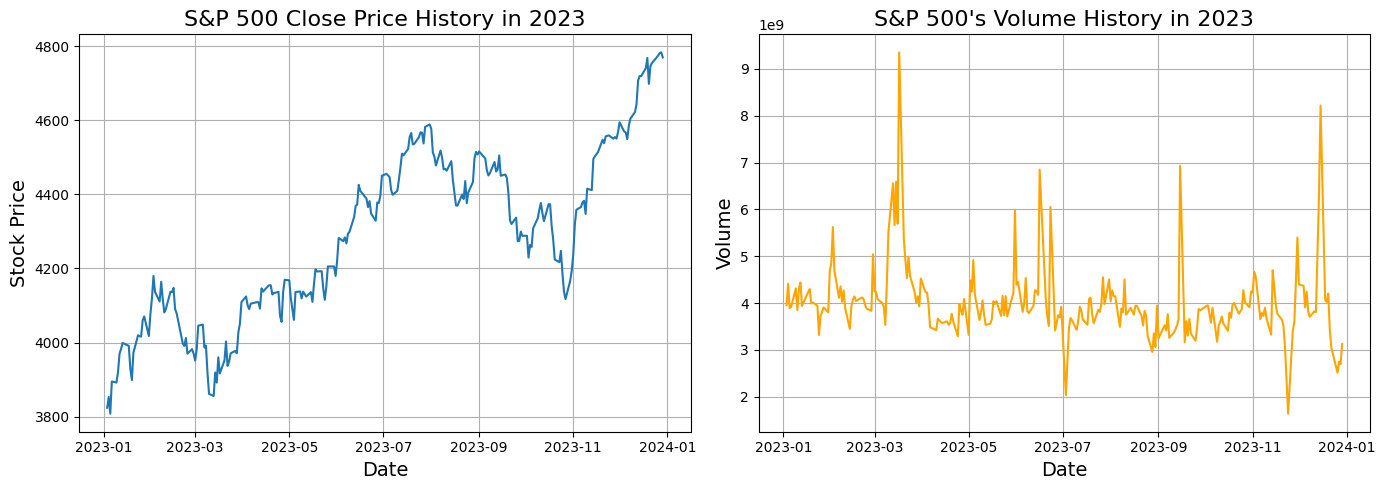

In [91]:
plot_price_and_volume(2023)

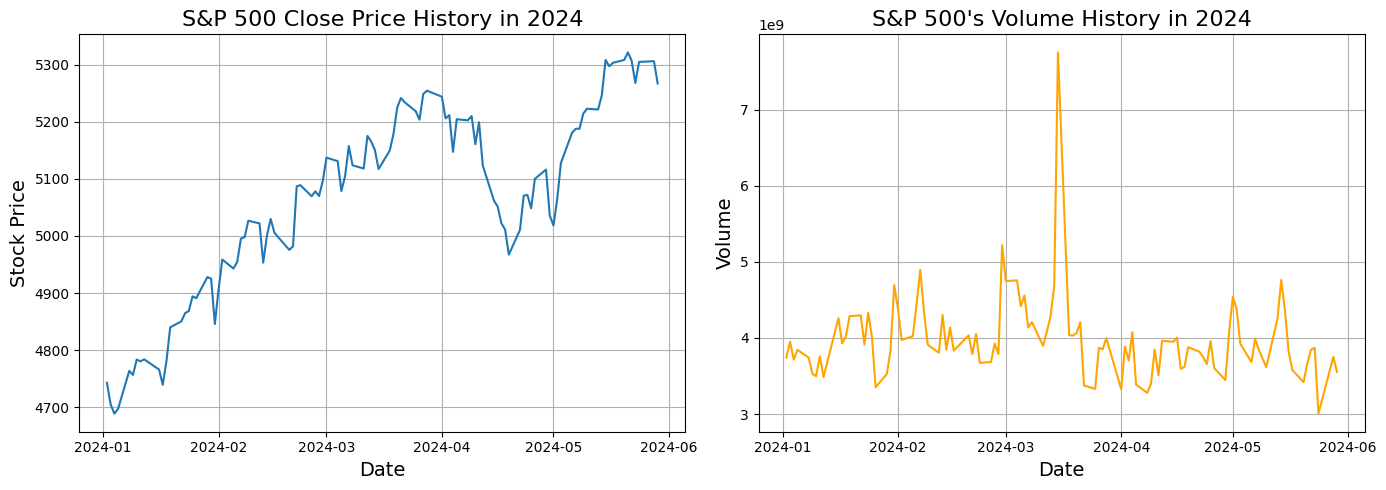

In [92]:
plot_price_and_volume(2024)

#### What does the historical price and trading volume data for the S&P 500 look like over the years from 2017 to 2024?

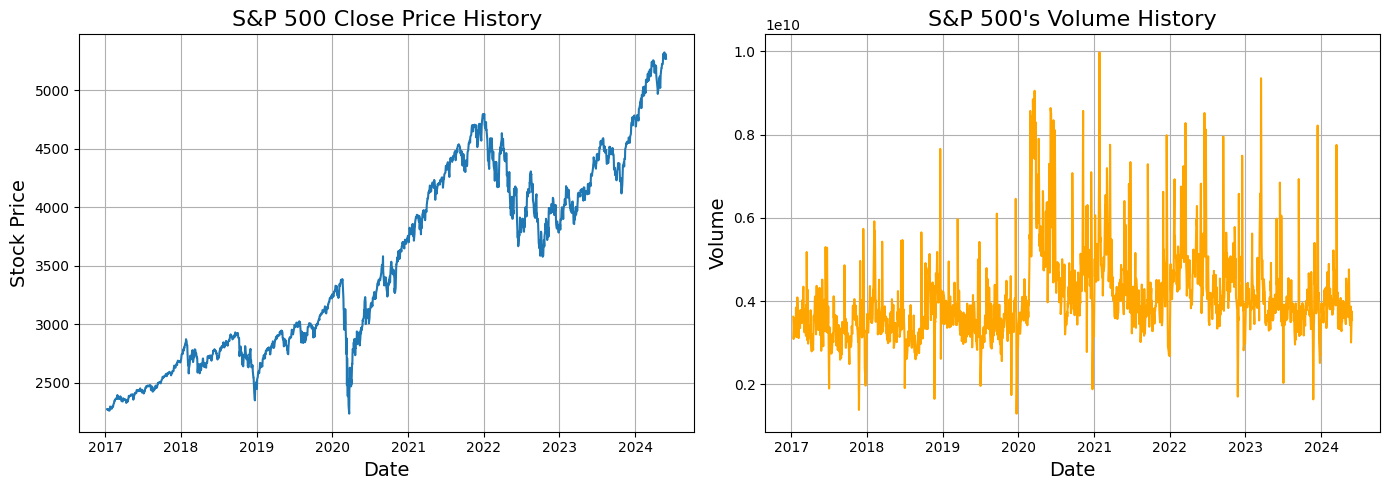

In [94]:
plot_price_and_volume(-1)

#### What is the average daily trading volume in 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024?

In [98]:
def calculate_avg_trading_vol(year: int):
    selected_df = df_cleaned[df_cleaned['date'].dt.year == year]

    avg_daily_trading_vol = selected_df['volume'].mean()
    print(f"The average daily trading volume in {year} is: {avg_daily_trading_vol}")


In [100]:
calculate_avg_trading_vol(2017)
calculate_avg_trading_vol(2018)
calculate_avg_trading_vol(2019)
calculate_avg_trading_vol(2020)
calculate_avg_trading_vol(2021)
calculate_avg_trading_vol(2022)
calculate_avg_trading_vol(2023)
calculate_avg_trading_vol(2024)

The average daily trading volume in 2017 is: 3416059061.2244897
The average daily trading volume in 2018 is: 3634742988.0478086
The average daily trading volume in 2019 is: 3558549642.857143
The average daily trading volume in 2020 is: 4922448418.972332
The average daily trading volume in 2021 is: 4417139920.634921
The average daily trading volume in 2022 is: 4617723067.729084
The average daily trading volume in 2023 is: 4013728760.0
The average daily trading volume in 2024 is: 3975197087.3786407


#### What are the 14-day, 50-day, 200-day moving averages in 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024?

In [193]:
def calculate_moving_avg(year: int):
    selected_df = df_cleaned[df_cleaned['date'].dt.year == year].copy()

    selected_df['14_day_moving_average'] = selected_df['close'].rolling(window=14).mean()
    selected_df['50_day_moving_average'] = selected_df['close'].rolling(window=50).mean()
    selected_df['200_day_moving_average'] = selected_df['close'].rolling(window=200).mean()


    plt.figure(figsize=(10, 5))
    plt.plot(selected_df['date'], selected_df['close'], label='Closing Price', color = 'blue')
    plt.plot(selected_df['date'], selected_df['14_day_moving_average'], label='14-day Moving Average', color='brown' , linestyle = '--')
    plt.plot(selected_df['date'], selected_df['50_day_moving_average'], label='50-day Moving Average', color='orange' , linestyle = '--')
    plt.plot(selected_df['date'], selected_df['200_day_moving_average'], label='200-day Moving Average', color='red' , linestyle = '--')


    plt.title(f'Closing Price and Moving Averages in {year}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    plt.grid(True)
    plt.show()

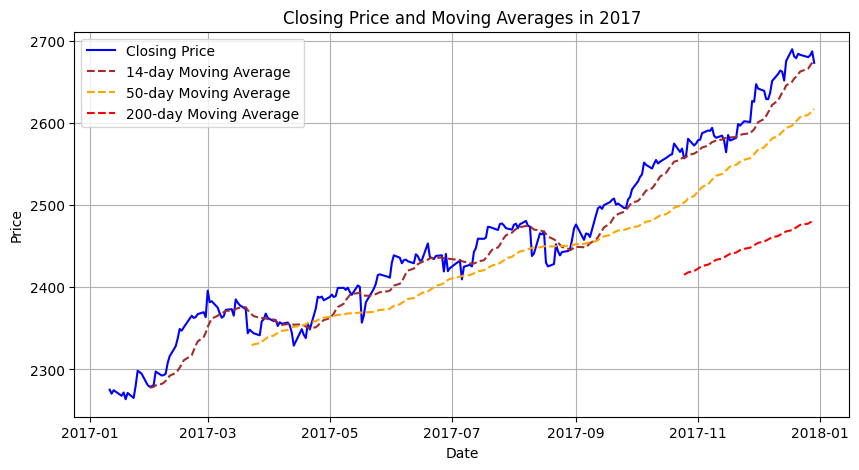

In [194]:
calculate_moving_avg(2017)

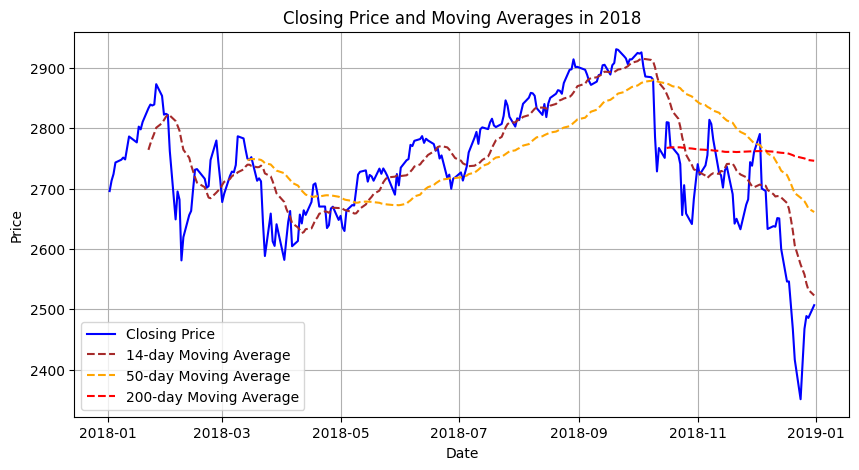

In [195]:
calculate_moving_avg(2018)

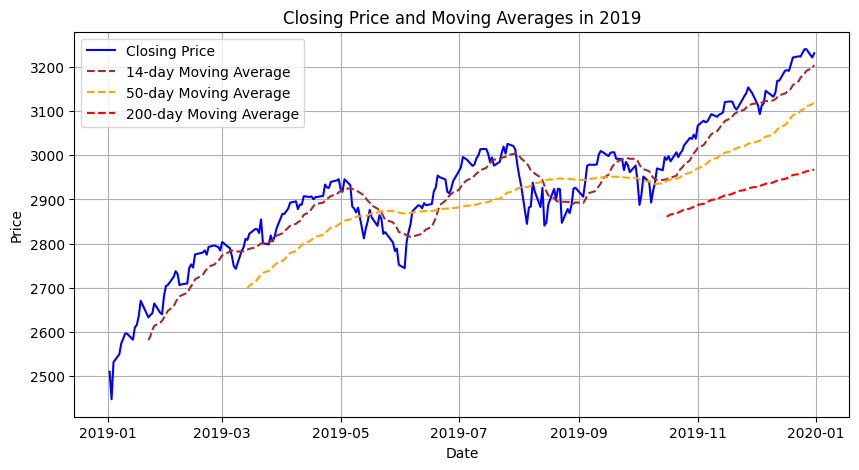

In [196]:
calculate_moving_avg(2019)

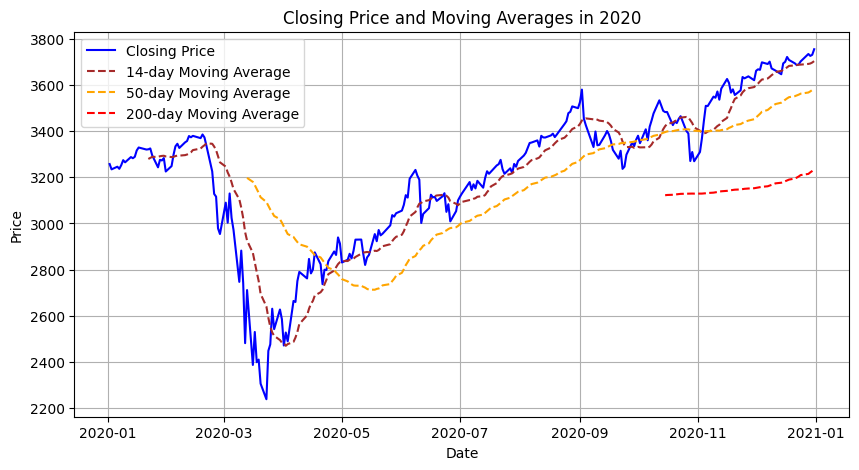

In [197]:
calculate_moving_avg(2020)

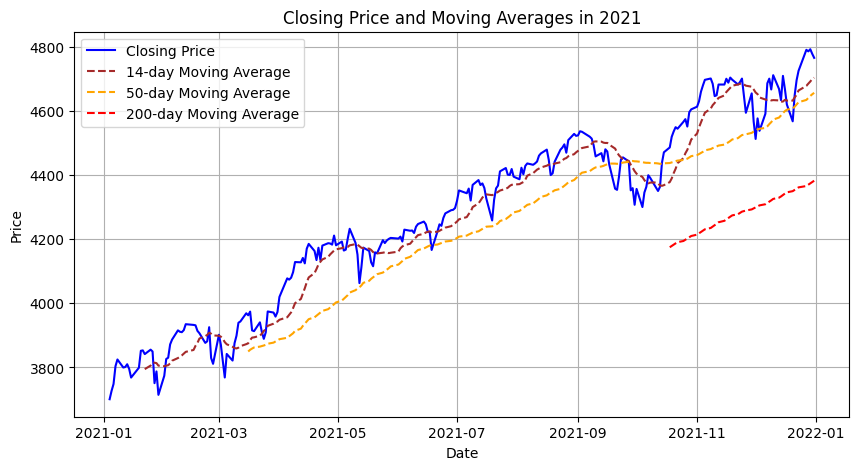

In [198]:
calculate_moving_avg(2021)

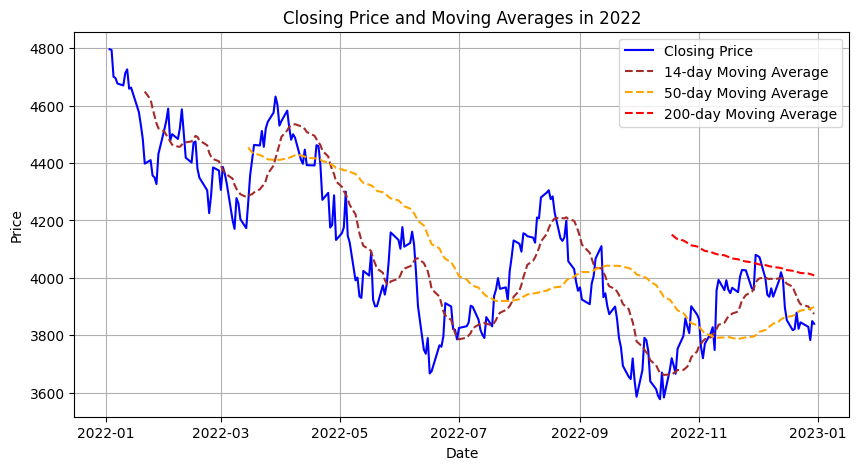

In [199]:
calculate_moving_avg(2022)

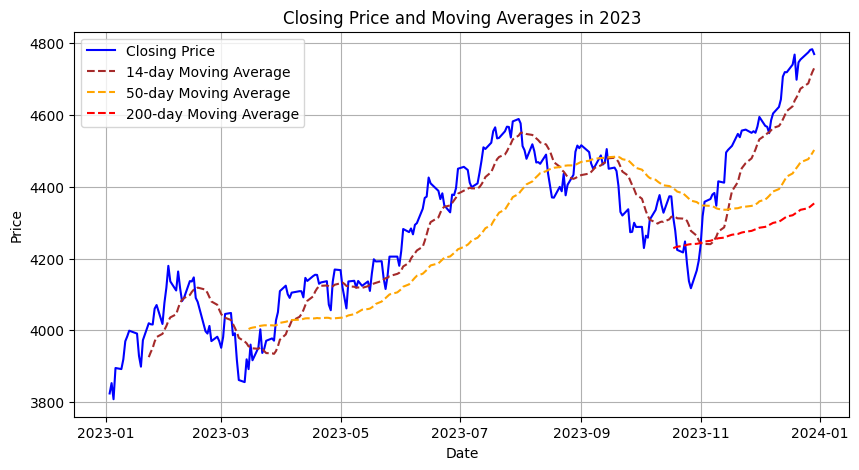

In [200]:
calculate_moving_avg(2023)

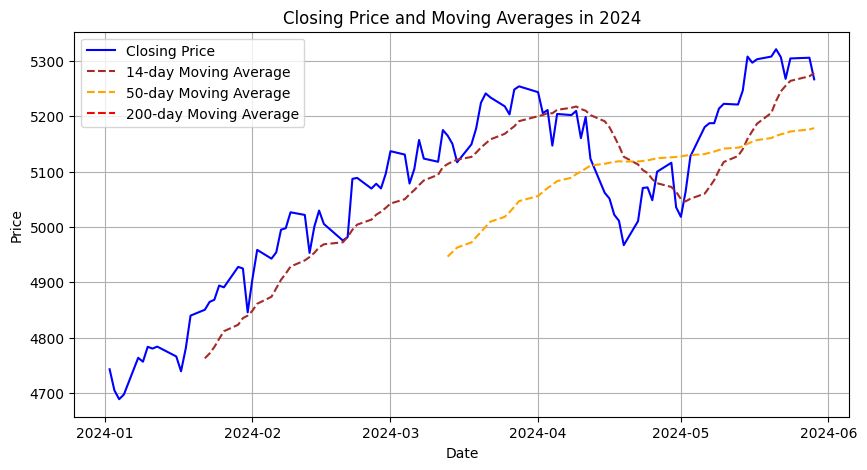

In [202]:
calculate_moving_avg(2024)

### Machine Learning

**What is Prophet?**

- Prophet is a forecasting tool created by Facebook for predicting time series data, which is data collected or recorded at specific time intervals. It is designed to handle different patterns in the data, such as daily, weekly, and yearly trends, as well as holidays.

**Key Features**

- Ease of Use: Prophet is user-friendly and allows people to create forecasts without needing deep knowledge in statistics.

- Handles Missing Data: It can manage gaps or missing values in the data.

- Works with Outliers: Prophet can deal with outliers, which are data points that are significantly different from others.


**How It Works**

- Trend Component: Prophet identifies the underlying trend in the data. This trend can change over time, and Prophet can model these changes as "growth".

- Seasonality Component: It captures repeating patterns, like daily, weekly, or yearly cycles.

- Holiday Effects: Prophet can incorporate the impact of holidays or special events that might affect the data.

**Why Use Prophet?**

- Accuracy: It provides accurate forecasts for data with complex seasonal patterns.

- Flexibility: It allows users to customize the model to fit specific needs, like adding holidays.

- Speed: Prophet is fast and can handle large datasets efficiently.



In [206]:
from prophet import Prophet


/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [210]:
model = Prophet()

# Drop the columns
df_prophet = df_cleaned.drop(['open', 'high', 'low','volume'], axis=1)
df_prophet.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

df_prophet.head()


,ds,y
0,2017-01-11,2275.320068
1,2017-01-12,2270.439941
2,2017-01-13,2274.639893
3,2017-01-17,2267.889893
4,2017-01-18,2271.889893


In [211]:
model.fit(df_prophet)

18:30:06 - cmdstanpy - INFO - Chain [1] start processing
18:30:07 - cmdstanpy - INFO - Chain [1] done processing


In [218]:
future_prices = model.make_future_dataframe(periods=365)
forecast = model.predict(future_prices)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2217,2025-05-25,6059.593124,5372.910882,6705.426572
2218,2025-05-26,6057.011907,5385.976129,6710.644439
2219,2025-05-27,6062.128094,5404.333485,6689.458038
2220,2025-05-28,6064.455316,5389.362958,6708.835230
2221,2025-05-29,6068.147964,5435.021515,6687.066981


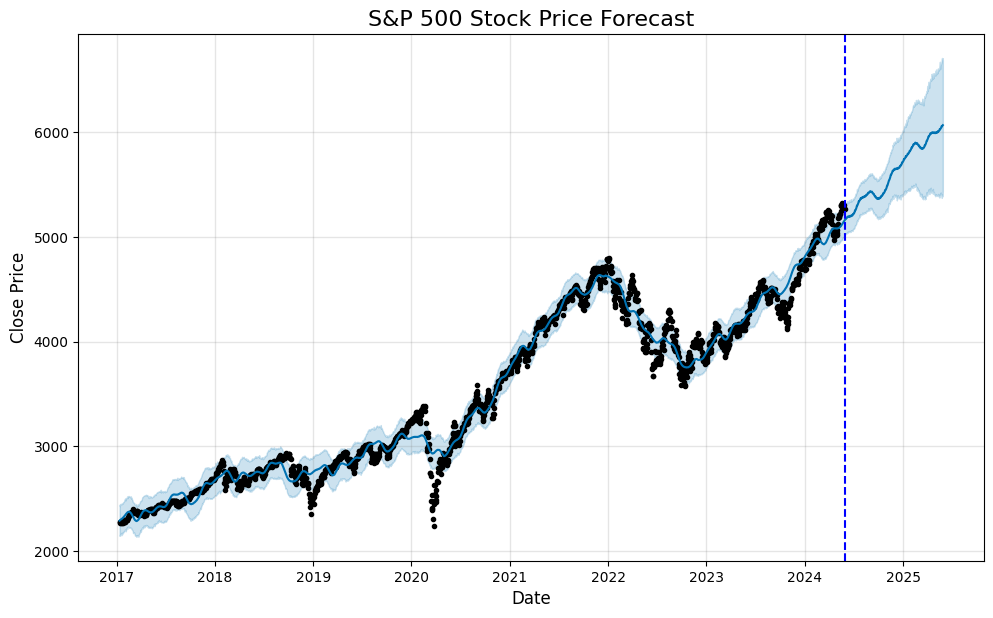

In [234]:
# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()  # Get the current axis of the plot

ax.set_title("S&P 500 Stock Price Forecast", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Close Price", fontsize=12)

# Draw a horizontal line at a specific y value
ax.axvline(x=forecast[forecast['ds'] == '2024-05-30']['ds'].values[0], color='b', linestyle='--')

plt.show()


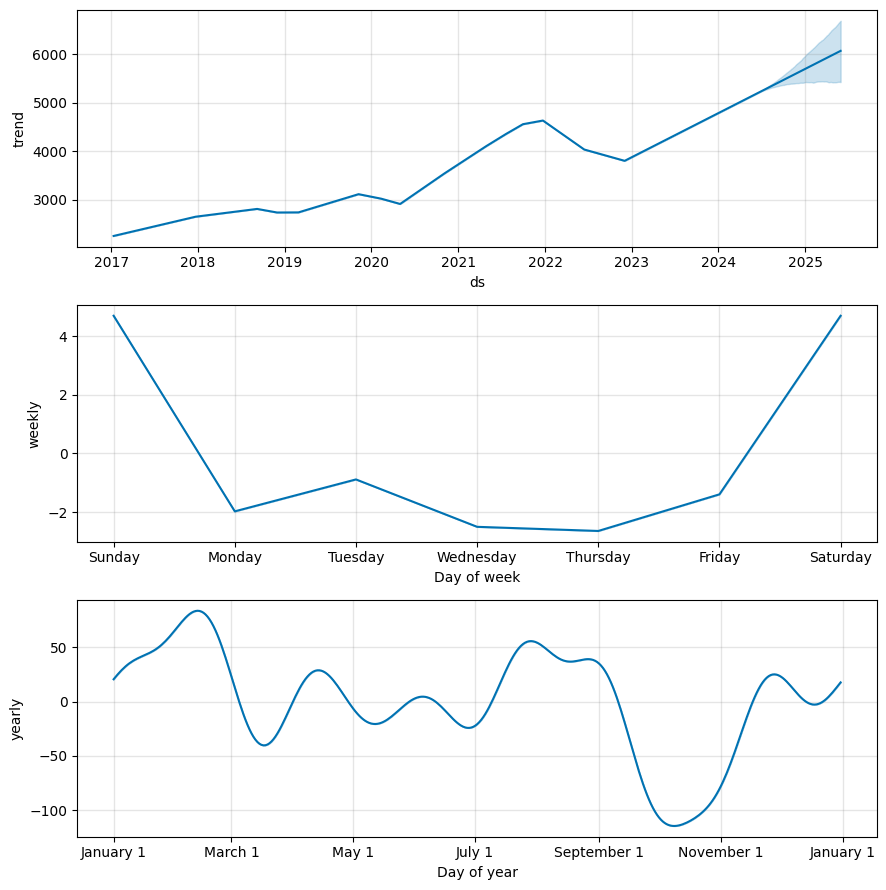

In [235]:
fig2 = model.plot_components(forecast)
plt.show()

In [238]:
import plotly.graph_objects as go
from plotly.offline import iplot

# OHLC data
trace = go.Ohlc(
    x=df_cleaned['date'],
    open=df_cleaned['open'],
    high=df_cleaned['high'],
    low=df_cleaned['low'],
    close=df_cleaned['close'],
    increasing=dict(line=dict(color='#58FA58')),
    decreasing=dict(line=dict(color='#FA5858'))
)

# Layout settings
layout = {
    'title': 'S&P 500 Historical Price',
    'xaxis': {
        'title': 'Date',
        'rangeslider': {'visible': False},
        'type': 'date'
    },
    'yaxis': {'title': 'S&P 500 Stock Price'}
}

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
iplot(fig, filename='simple_ohlc')


### Transform Data for Tableau Dashboard

In [239]:
df_cleaned.head()


,date,high,low,open,close,volume
0,2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3625080000
1,2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3466220000
2,2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3090680000
3,2017-01-17,2272.080078,2262.810059,2269.139893,2267.889893,3586950000
4,2017-01-18,2272.010010,2263.350098,2269.139893,2271.889893,3317670000


In [240]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1857 non-null   datetime64[ns]
 1   high    1857 non-null   float64       
 2   low     1857 non-null   float64       
 3   open    1857 non-null   float64       
 4   close   1857 non-null   float64       
 5   volume  1857 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 87.2 KB


In [242]:
df_cleaned.to_csv('Data/cleaned_data.csv', index=False)

### Tableau Dashboard